# UK Train Travelers Behavior Analysis

## Data Transformation & Data Analysis

In [15]:
# Loading the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import plotly.express as px


Lets load the dataset here!, the Data include following in Railway data.

| Field | Description|
|-------|------------|
| **Transaction ID**| Unique identifier for an individual train ticket purchase| 
| **Date of Purchase**| Date the ticket was purchased| 
| **Time of Purchase**| Time the ticket was purchased| 
| **Purchase Type**| Whether the ticket was purchased online or directly at a train station| 
| **Payment Method**| Payment method used to purchase the ticket (Contactles, Credit Card, or Debit Card)| 
| **Railcard**| Whether the passenger is a National Railcard holder (Adult, Senior, or Disabled) or not (None). Railcard holders get 1/3 off their ticket purchases.| 
| **Ticket Class**| Seat class for the ticket (Standard or First)| 
| **Ticket Type**| When you bought or can use the ticket. Advance tickets are 1/2 off and must be purchased at least a day prior to departure. Off-Peak tickets are 1/4 off and must be used outside of peak hours (weekdays between 6-8am and 4-6pm). Anytime tickets are full price and can be bought and used at any time during the day.| 
| **Price**| Final cost of the ticket| 
| **Departure Station**| Station to board the train| 
| **Arrival Destination**| Station to exit the train| 
| **Date of Journey**| Date the train departed| 
| **Departure Time**| Time the train departed| 
| **Arrival Time**| Time the train was scheduled to arrive at its destination (can be on the day after departure)| 
| **Actual Arrival Time**| Time the train arrived at its destination (can be on the day after departure)| 
| **Journey Status**| Whether the train was on time, delayed, or cancelled| 
| **Reason for Delay**| Reason for the delay or cancellation| 
| **Refund Request**| Whether the passenger requested a refund after a delay or cancellation| 

In [16]:
# loading the Data
uk_train = pd.read_csv("D:/My Learning/My Projects/Project UK Railways/Data/railway.csv")
uk_train.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [17]:
uk_train["route"] = uk_train["Departure Station"] + uk_train["Arrival Destination"]
uk_train["route"].value_counts().idxmax()

'Manchester PiccadillyLiverpool Lime Street'

In [18]:
# Assuming uk_train is your DataFrame
uk_train["Date of Purchase"] = pd.to_datetime(uk_train["Date of Purchase"])

# Creating a list of weekday
weekday = [date.strftime('%A')  for date in uk_train["Date of Purchase"]]
uk_train["Day of week"] = weekday
uk_train.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,route,Day of week
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No,London PaddingtonLiverpool Lime Street,Friday
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,London Kings CrossYork,Saturday
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No,Liverpool Lime StreetManchester Piccadilly,Tuesday
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No,London PaddingtonReading,Wednesday
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No,Liverpool Lime StreetLondon Euston,Wednesday


### Day of week

The day of the week we explore following factors
  - Frequency of each week day.
  - Average Ticket sales each week day
  - Peak time for each week day
  - Departure Stations for each Week Day
  - Arrival Station for each Week Day
  - Journey Status for each week Day

In [19]:
uk_train["Day of week"].value_counts()

Day of week
Sunday       4676
Friday       4627
Wednesday    4602
Saturday     4477
Monday       4455
Tuesday      4454
Thursday     4362
Name: count, dtype: int64

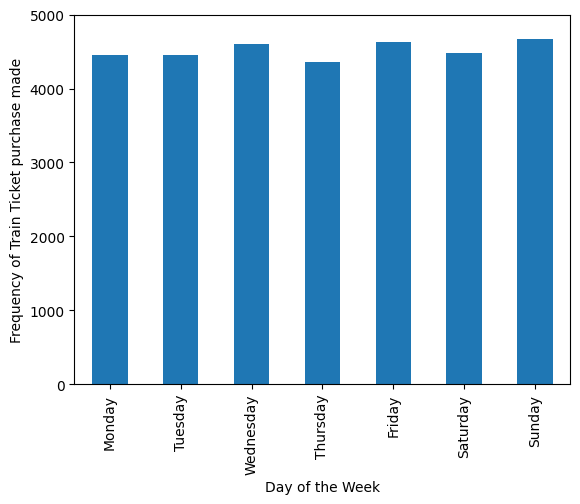

In [20]:
# Create Bar chart to visualize Frequency
day_counts = uk_train["Day of week"].value_counts()
# Order of Chart
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Create Bar chart
day_counts = day_counts.reindex(weekday_order)
day_counts.plot(kind="bar")
plt.ylim(0,5000)
plt.xlabel("Day of the Week")
plt.ylabel("Frequency of Train Ticket purchase made")

# Show the plot
plt.show()


Even though all week days have almost equivalent, but Highest Train travel were done on **Sunday** and Lowest Train Travel were done on **Thursday**.

In [21]:
# Average Sales Ticket
a1 = uk_train.groupby("Day of week")["Price"].mean()
a1

Day of week
Friday       23.618543
Monday       24.669136
Saturday     22.222470
Sunday       21.399059
Thursday     23.251949
Tuesday      24.737988
Wednesday    24.245328
Name: Price, dtype: float64

In [22]:
bar_price = uk_train[["Payment Method", "Price"]]
bar_4 = bar_price.groupby("Payment Method")["Price"].mean().round(2).reset_index()
bar_4


,Payment Method,Price
0,Contactless,20.26
1,Credit Card,24.54
2,Debit Card,31.47


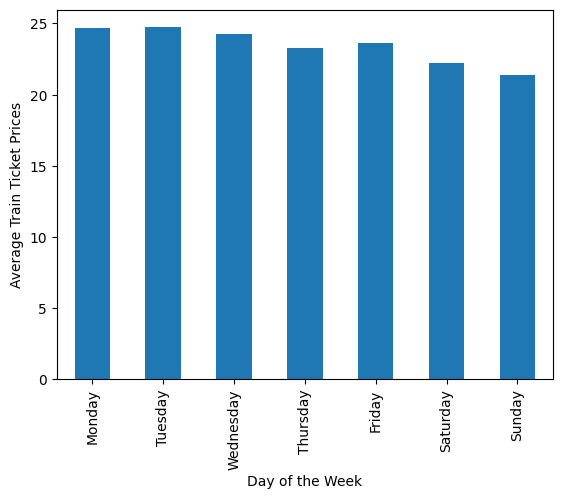

In [23]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Create Bar chart
days = a1.reindex(weekday_order)
days.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Average Train Ticket Prices")
plt.show()

We can see that average ticket prices is higher in **Friday**, Lowest in **Wednesday**.

In [24]:
# Calculating time 
def round_to_hour(dt):
    if pd.isna(dt):  # Check if the value is NaN
        return pd.NaT  # Return NaT (Not a Time)
    if isinstance(dt, str):
        dt = pd.to_datetime(dt, format='%H:%M:%S')
    if isinstance(dt, pd.Timestamp):  # Check if the value is a valid timestamp
        if dt.minute >= 30:
            dt += pd.Timedelta(hours=1)
        return dt.replace(minute=0, second=0, microsecond=0)
    else:
        return pd.NaT  # Return NaT for invalid values

# Example usage:


# Example usage:
uk_train["Hour of Departure"] = uk_train["Departure Time"].apply(round_to_hour).dt.hour
uk_train["Hour of Departure"] = uk_train["Departure Time"].apply(round_to_hour).dt.hour
uk_train["Hour of Purchase"] = uk_train["Time of Purchase"].apply(round_to_hour).dt.hour
uk_train["Hour of Arrival"] = uk_train["Actual Arrival Time"].apply(round_to_hour).dt.hour


In [25]:
# Grouping week Days
g1 = uk_train.groupby("Day of week")["Hour of Departure"].value_counts().reset_index()
g1 = g1.sort_values(by="Hour of Departure")

In [26]:
g1.head()

,Day of week,Hour of Departure,count
58,Saturday,0,161
105,Thursday,0,151
127,Tuesday,0,171
85,Sunday,0,152
7,Friday,0,181


C:\Users\Kishore\AppData\Local\Temp\ipykernel_16328\4161027694.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day['Hour of Departure'] = data_day['Hour of Departure'].map(hour_labels)
C:\Users\Kishore\AppData\Local\Temp\ipykernel_16328\4161027694.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day['Hour of Departure'] = data_day['Hour of Departure'].map(hour_labels)
C:\Users\Kishore\AppData\Local\Temp\ipykernel_16328\4161027694.py:20: SettingWithCopyWarning: 
A value is trying to be set

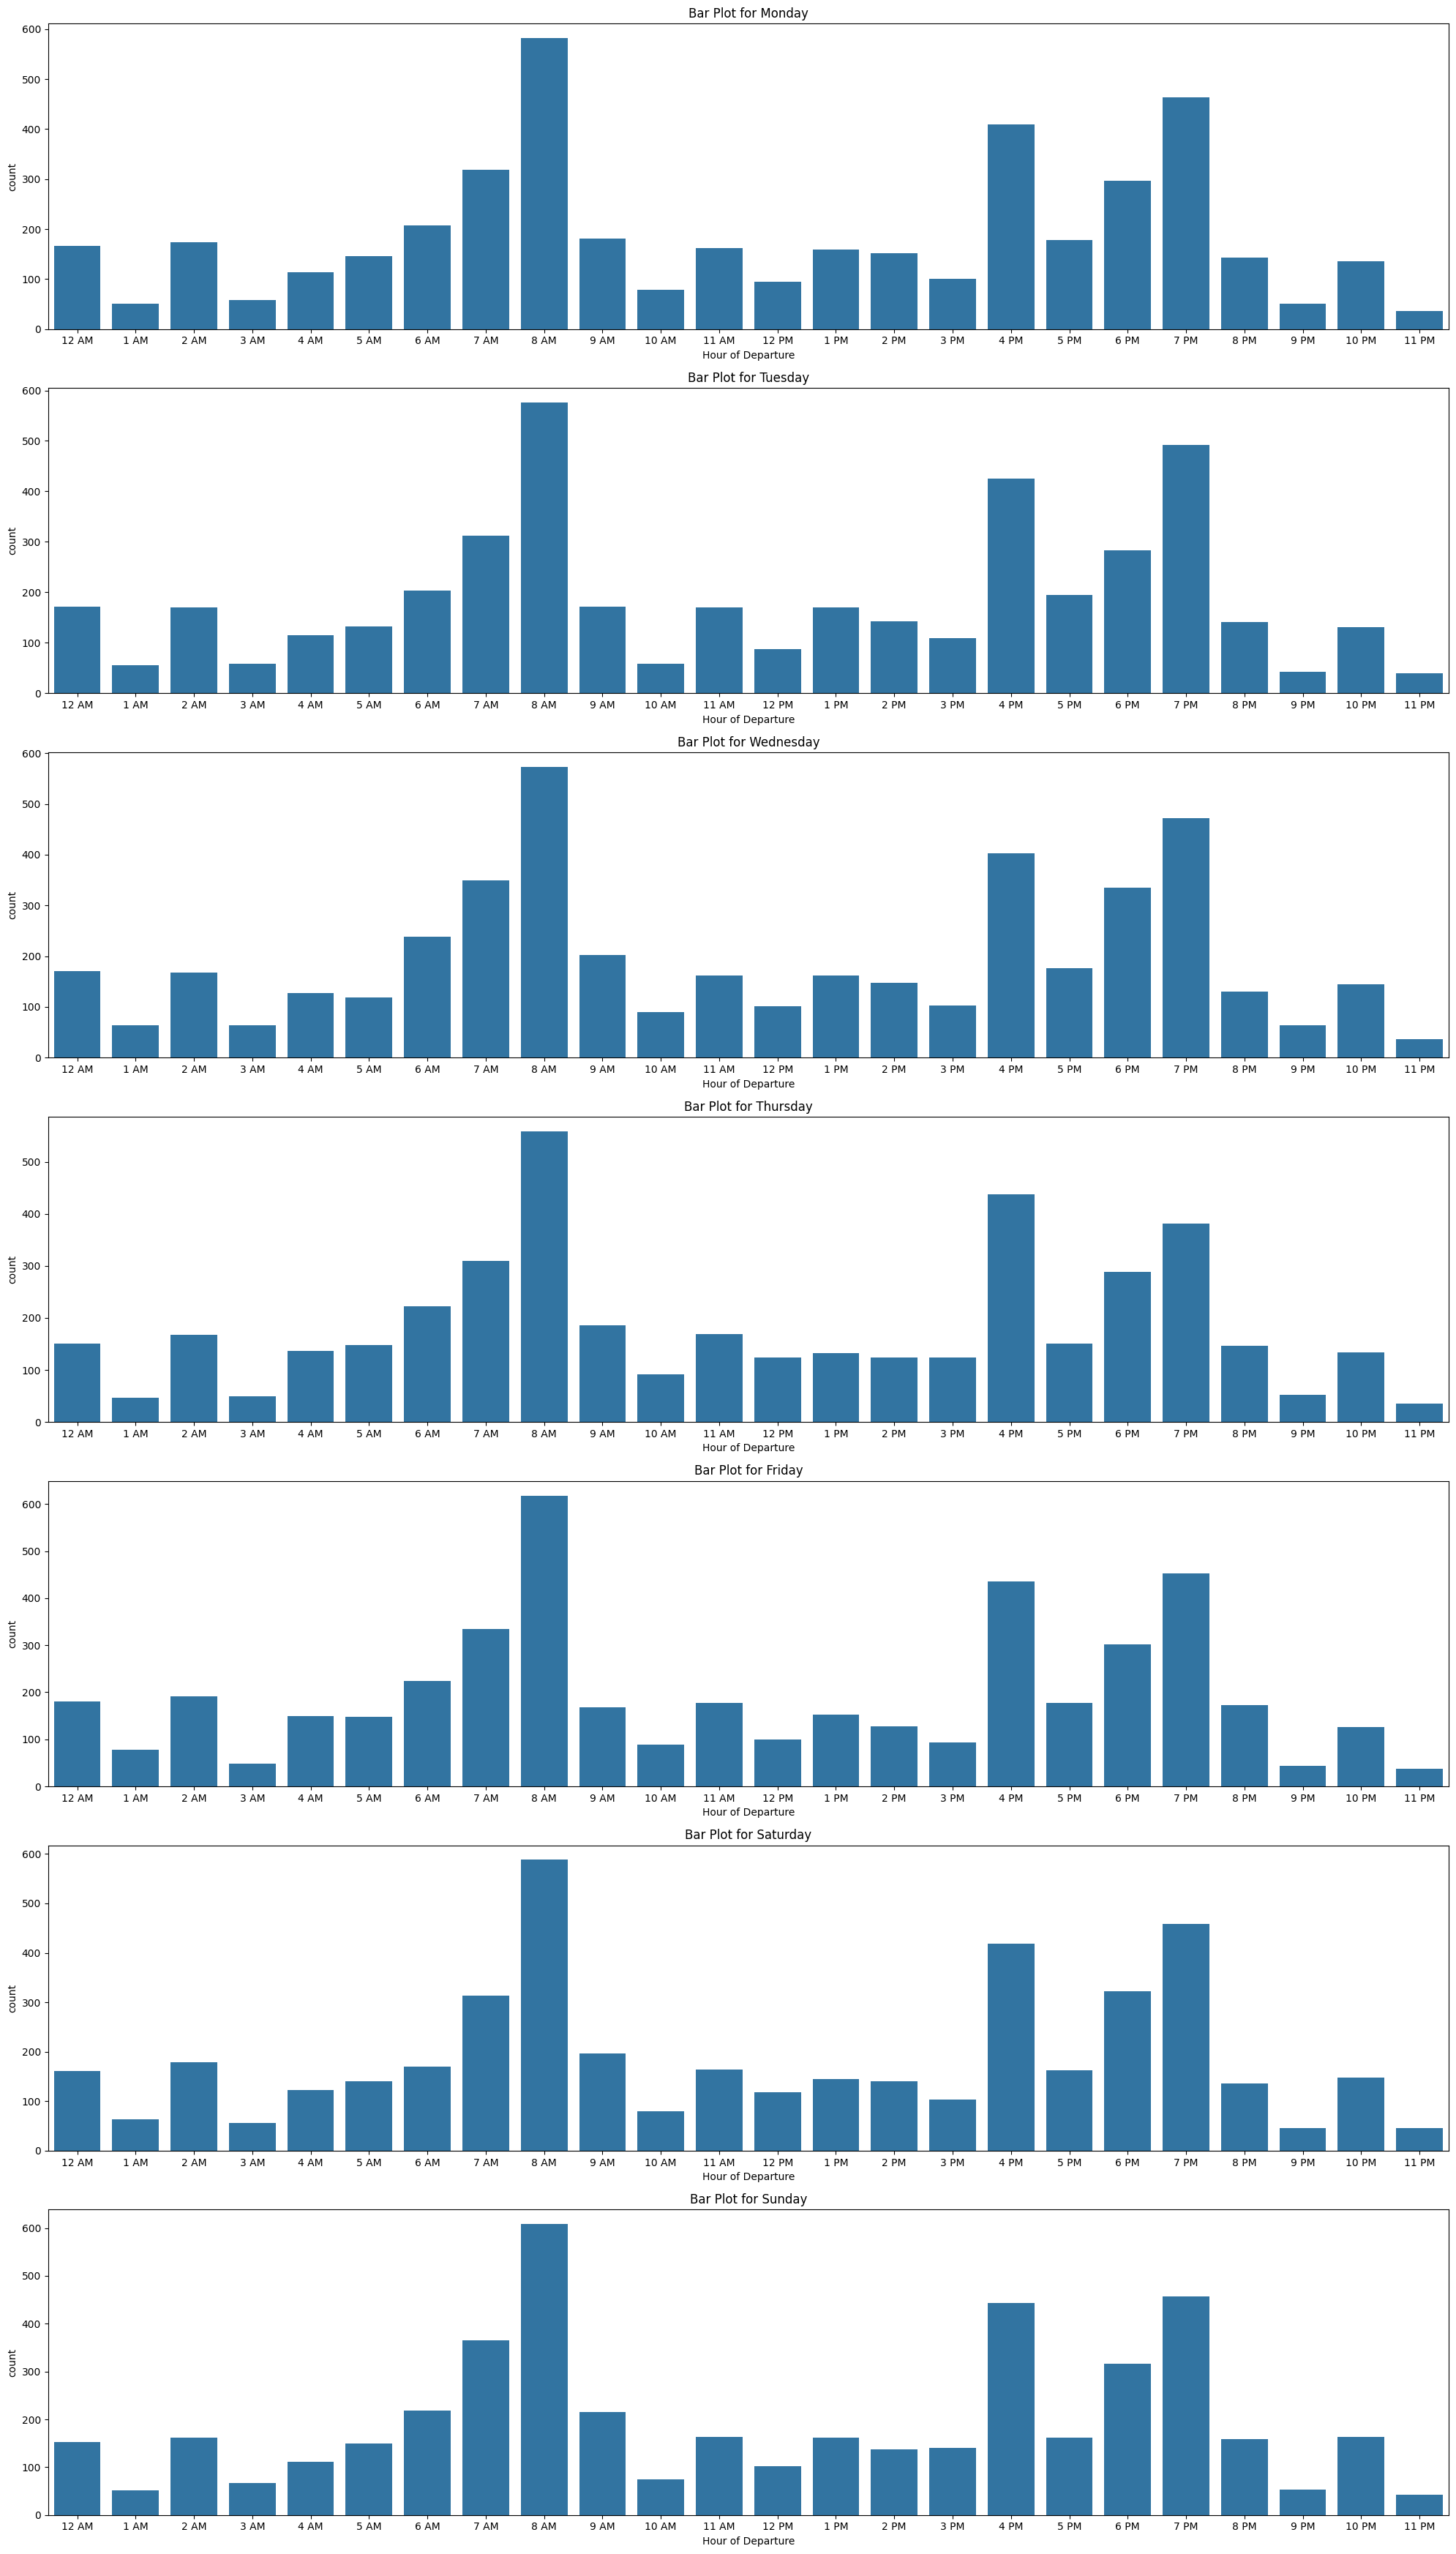

In [27]:


# Get unique days of the week
unique_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hour_labels = {
    0: "12 AM", 1: "1 AM", 2: "2 AM", 3: "3 AM", 4: "4 AM",
    5: "5 AM", 6: "6 AM", 7: "7 AM", 8: "8 AM", 9: "9 AM",
    10: "10 AM", 11: "11 AM", 12: "12 PM", 13: "1 PM", 14: "2 PM",
    15: "3 PM", 16: "4 PM", 17: "5 PM", 18: "6 PM", 19: "7 PM",
    20: "8 PM", 21: "9 PM", 22: "10 PM", 23: "11 PM"
}

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=len(unique_days), ncols=1, figsize=(20, 5*len(unique_days)))

# Iterate over unique days and create a plot for each
for i, day in enumerate(unique_days):
    # Filter data for the current day
    data_day = g1[g1['Day of week'] == day]
    
    # Convert "Hour of Departure" to categorical type with specified order
    data_day['Hour of Departure'] = data_day['Hour of Departure'].map(hour_labels)
    
    # Create count plot for the current day
    sns.barplot(x="Hour of Departure", y="count", data=data_day, ax=axes[i])
    
    # Set title for the plot
    axes[i].set_title(f'Bar Plot for {day}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [28]:
data_day

,Day of week,Hour of Departure,count
85,Sunday,12 AM,152
94,Sunday,1 AM,51
81,Sunday,2 AM,162
92,Sunday,3 AM,67
89,Sunday,4 AM,112
86,Sunday,5 AM,149
77,Sunday,6 AM,219
75,Sunday,7 AM,365
72,Sunday,8 AM,608
78,Sunday,9 AM,215


We can see that there is increase purchase of train Tickets on 8 am in morning, and secondary peak hour can be seen on 8 pm in night every day. This is bit interesting to see peek hours has a 12 hrs cycle.

In [29]:
a2 = uk_train.groupby("Day of week")["Departure Station"].value_counts().reset_index()
a2.head()

,Day of week,Departure Station,count
0,Friday,Manchester Piccadilly,822
1,Friday,Liverpool Lime Street,713
2,Friday,London Euston,688
3,Friday,London Paddington,637
4,Friday,London Kings Cross,631


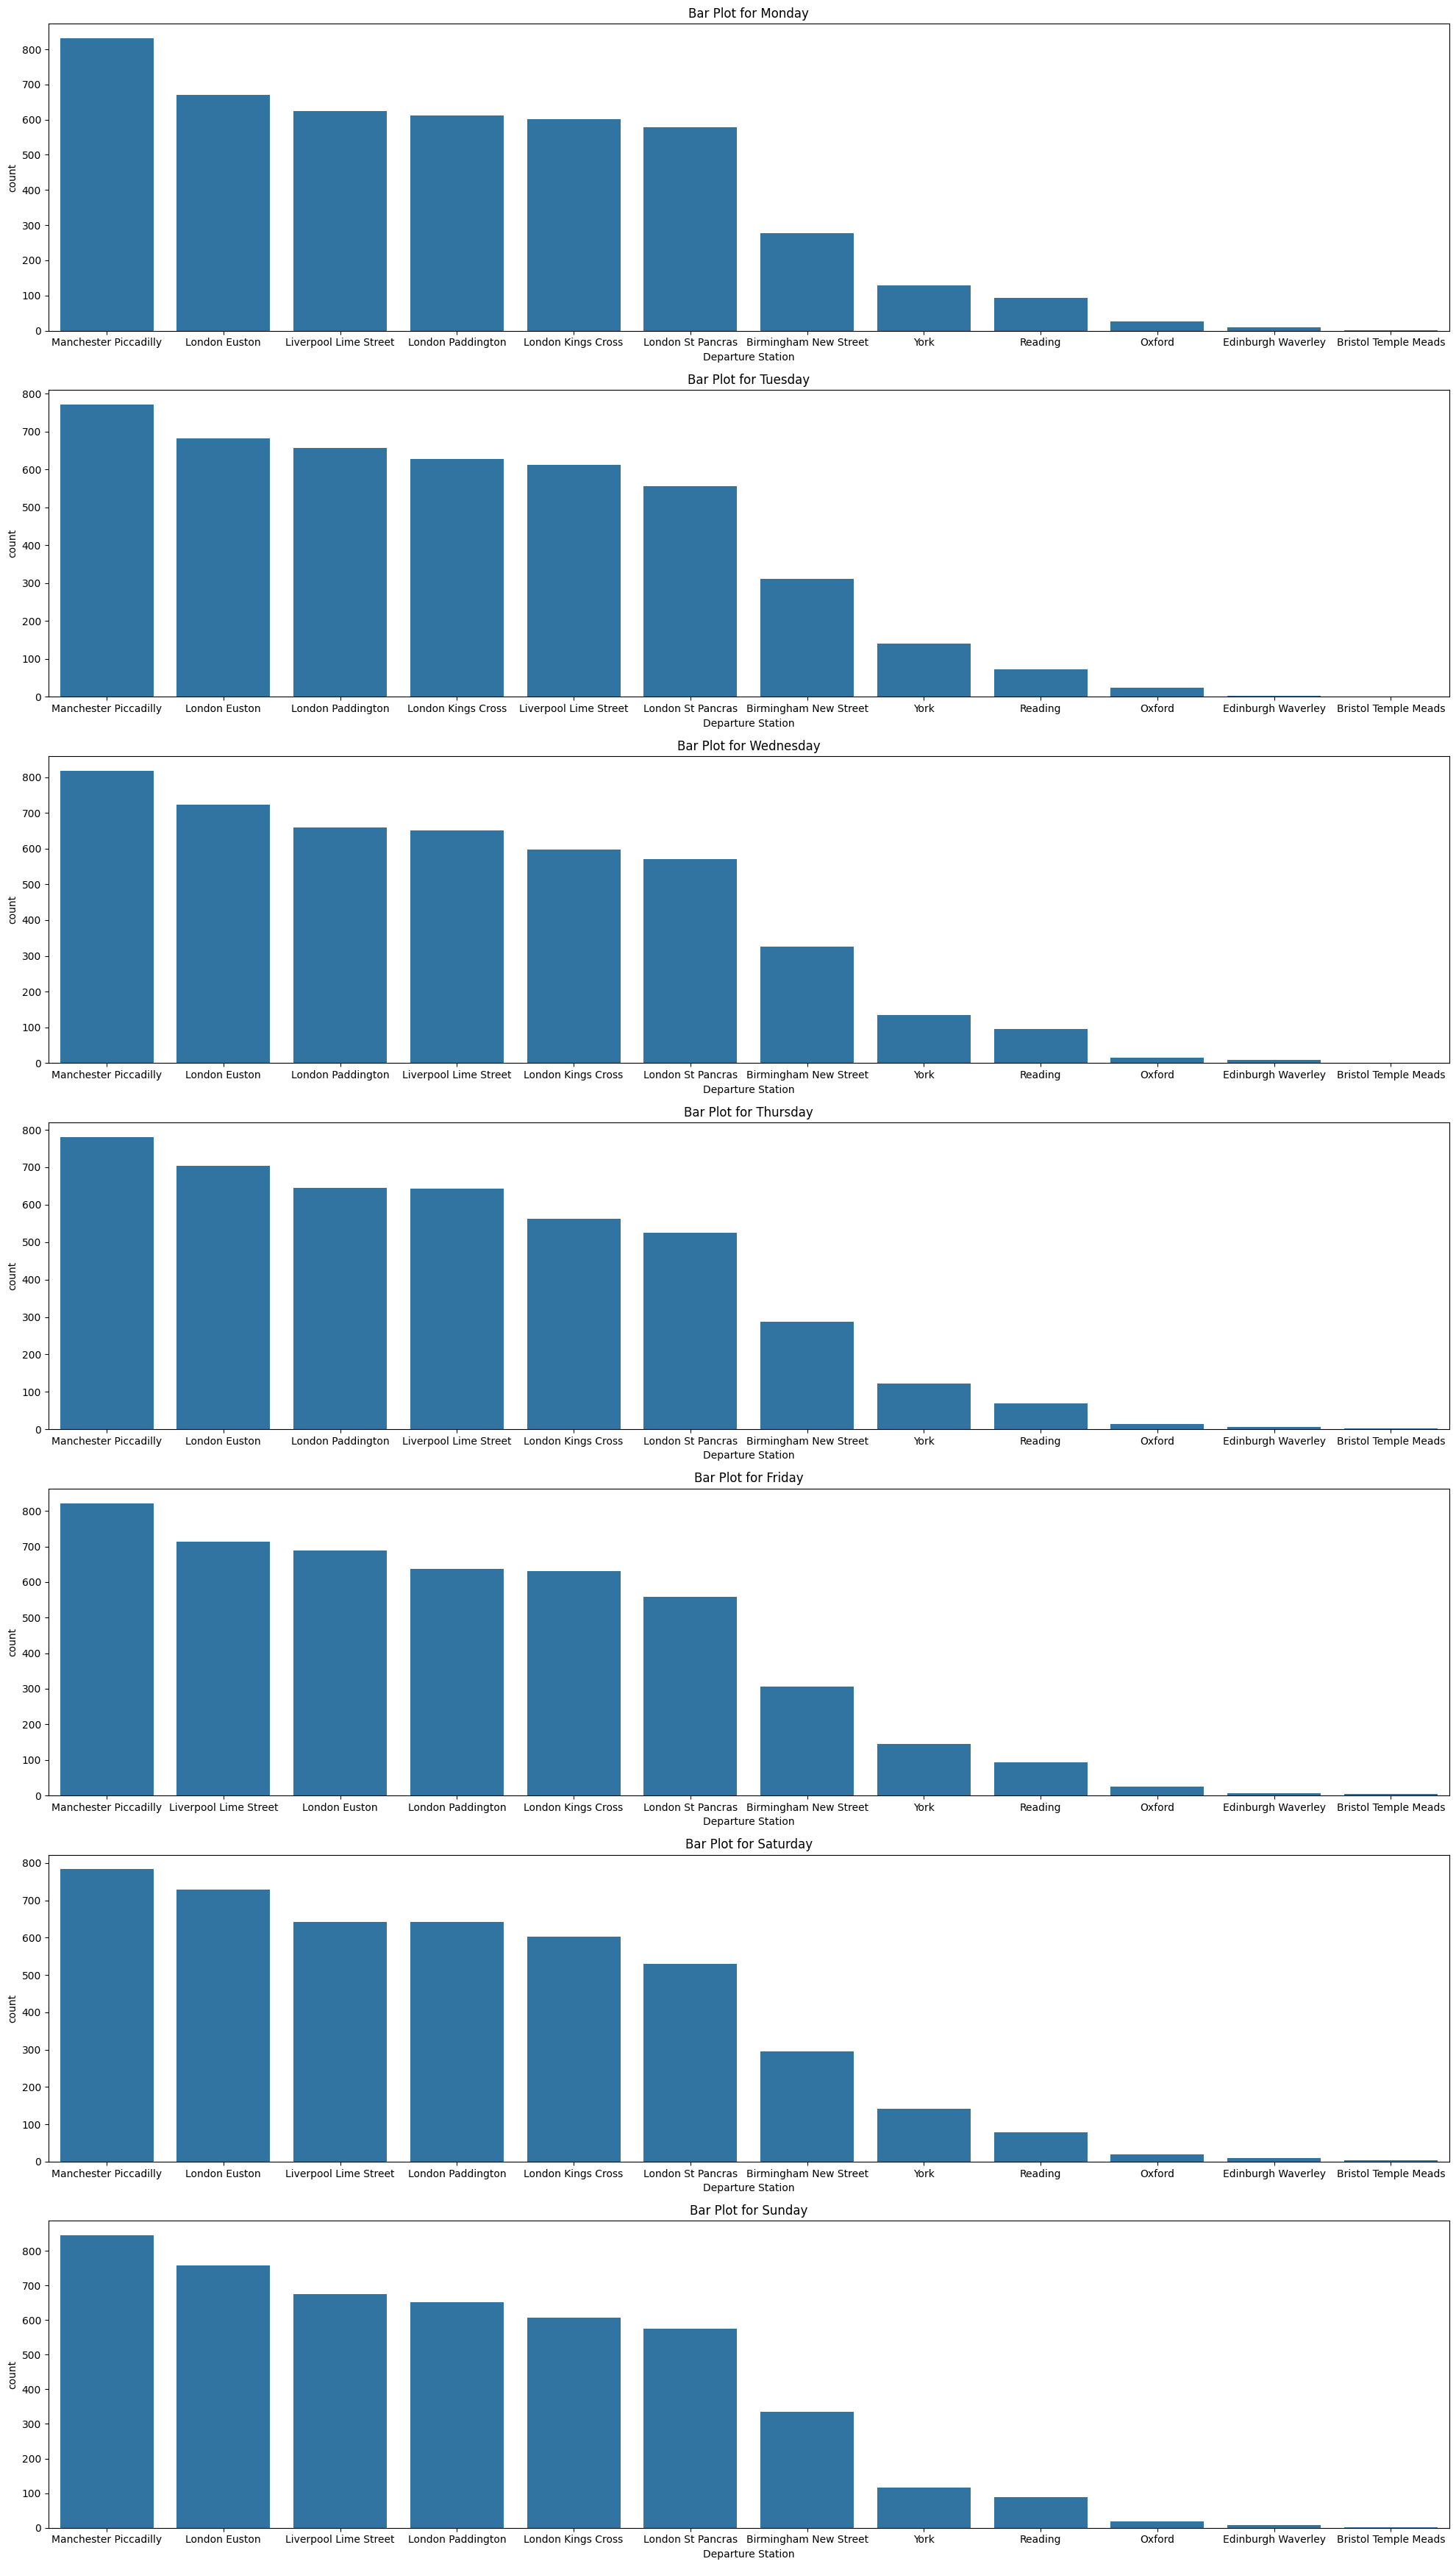

In [30]:
# Get unique days of the week
unique_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=len(unique_days), ncols=1, figsize=(20, 5*len(unique_days)))

# Iterate over unique days and create a plot for each
for i, day in enumerate(unique_days):
    # Filter data for the current day
    data_day = a2[a2['Day of week'] == day]
    
    # Create count plot for the current day
    sns.barplot(x="Departure Station", y ="count", data=data_day, ax=axes[i])
    
    # Set title for the plot
    axes[i].set_title(f'Bar Plot for {day}')
    
    
    # Optionally, set other plot properties such as x-axis label, y-axis label, etc.
    # axes[i].set_xlabel('Hour')
    # axes[i].set_ylabel('Count')
    # axes[i].legend(title='Hour')

# Adjust layout to prevent overlapping
plt.tight_layout()


# Show the plots
plt.show()

**Manchester Piccadilly** is most popular departure destination and **Bristol Temple Meads** is least popular departure destination.

In [31]:
a3 = uk_train.groupby("Day of week")["Arrival Destination"].value_counts().reset_index()
a3.head()

,Day of week,Arrival Destination,count
0,Friday,Birmingham New Street,1088
1,Friday,Liverpool Lime Street,719
2,Friday,Manchester Piccadilly,620
3,Friday,York,599
4,Friday,Reading,543


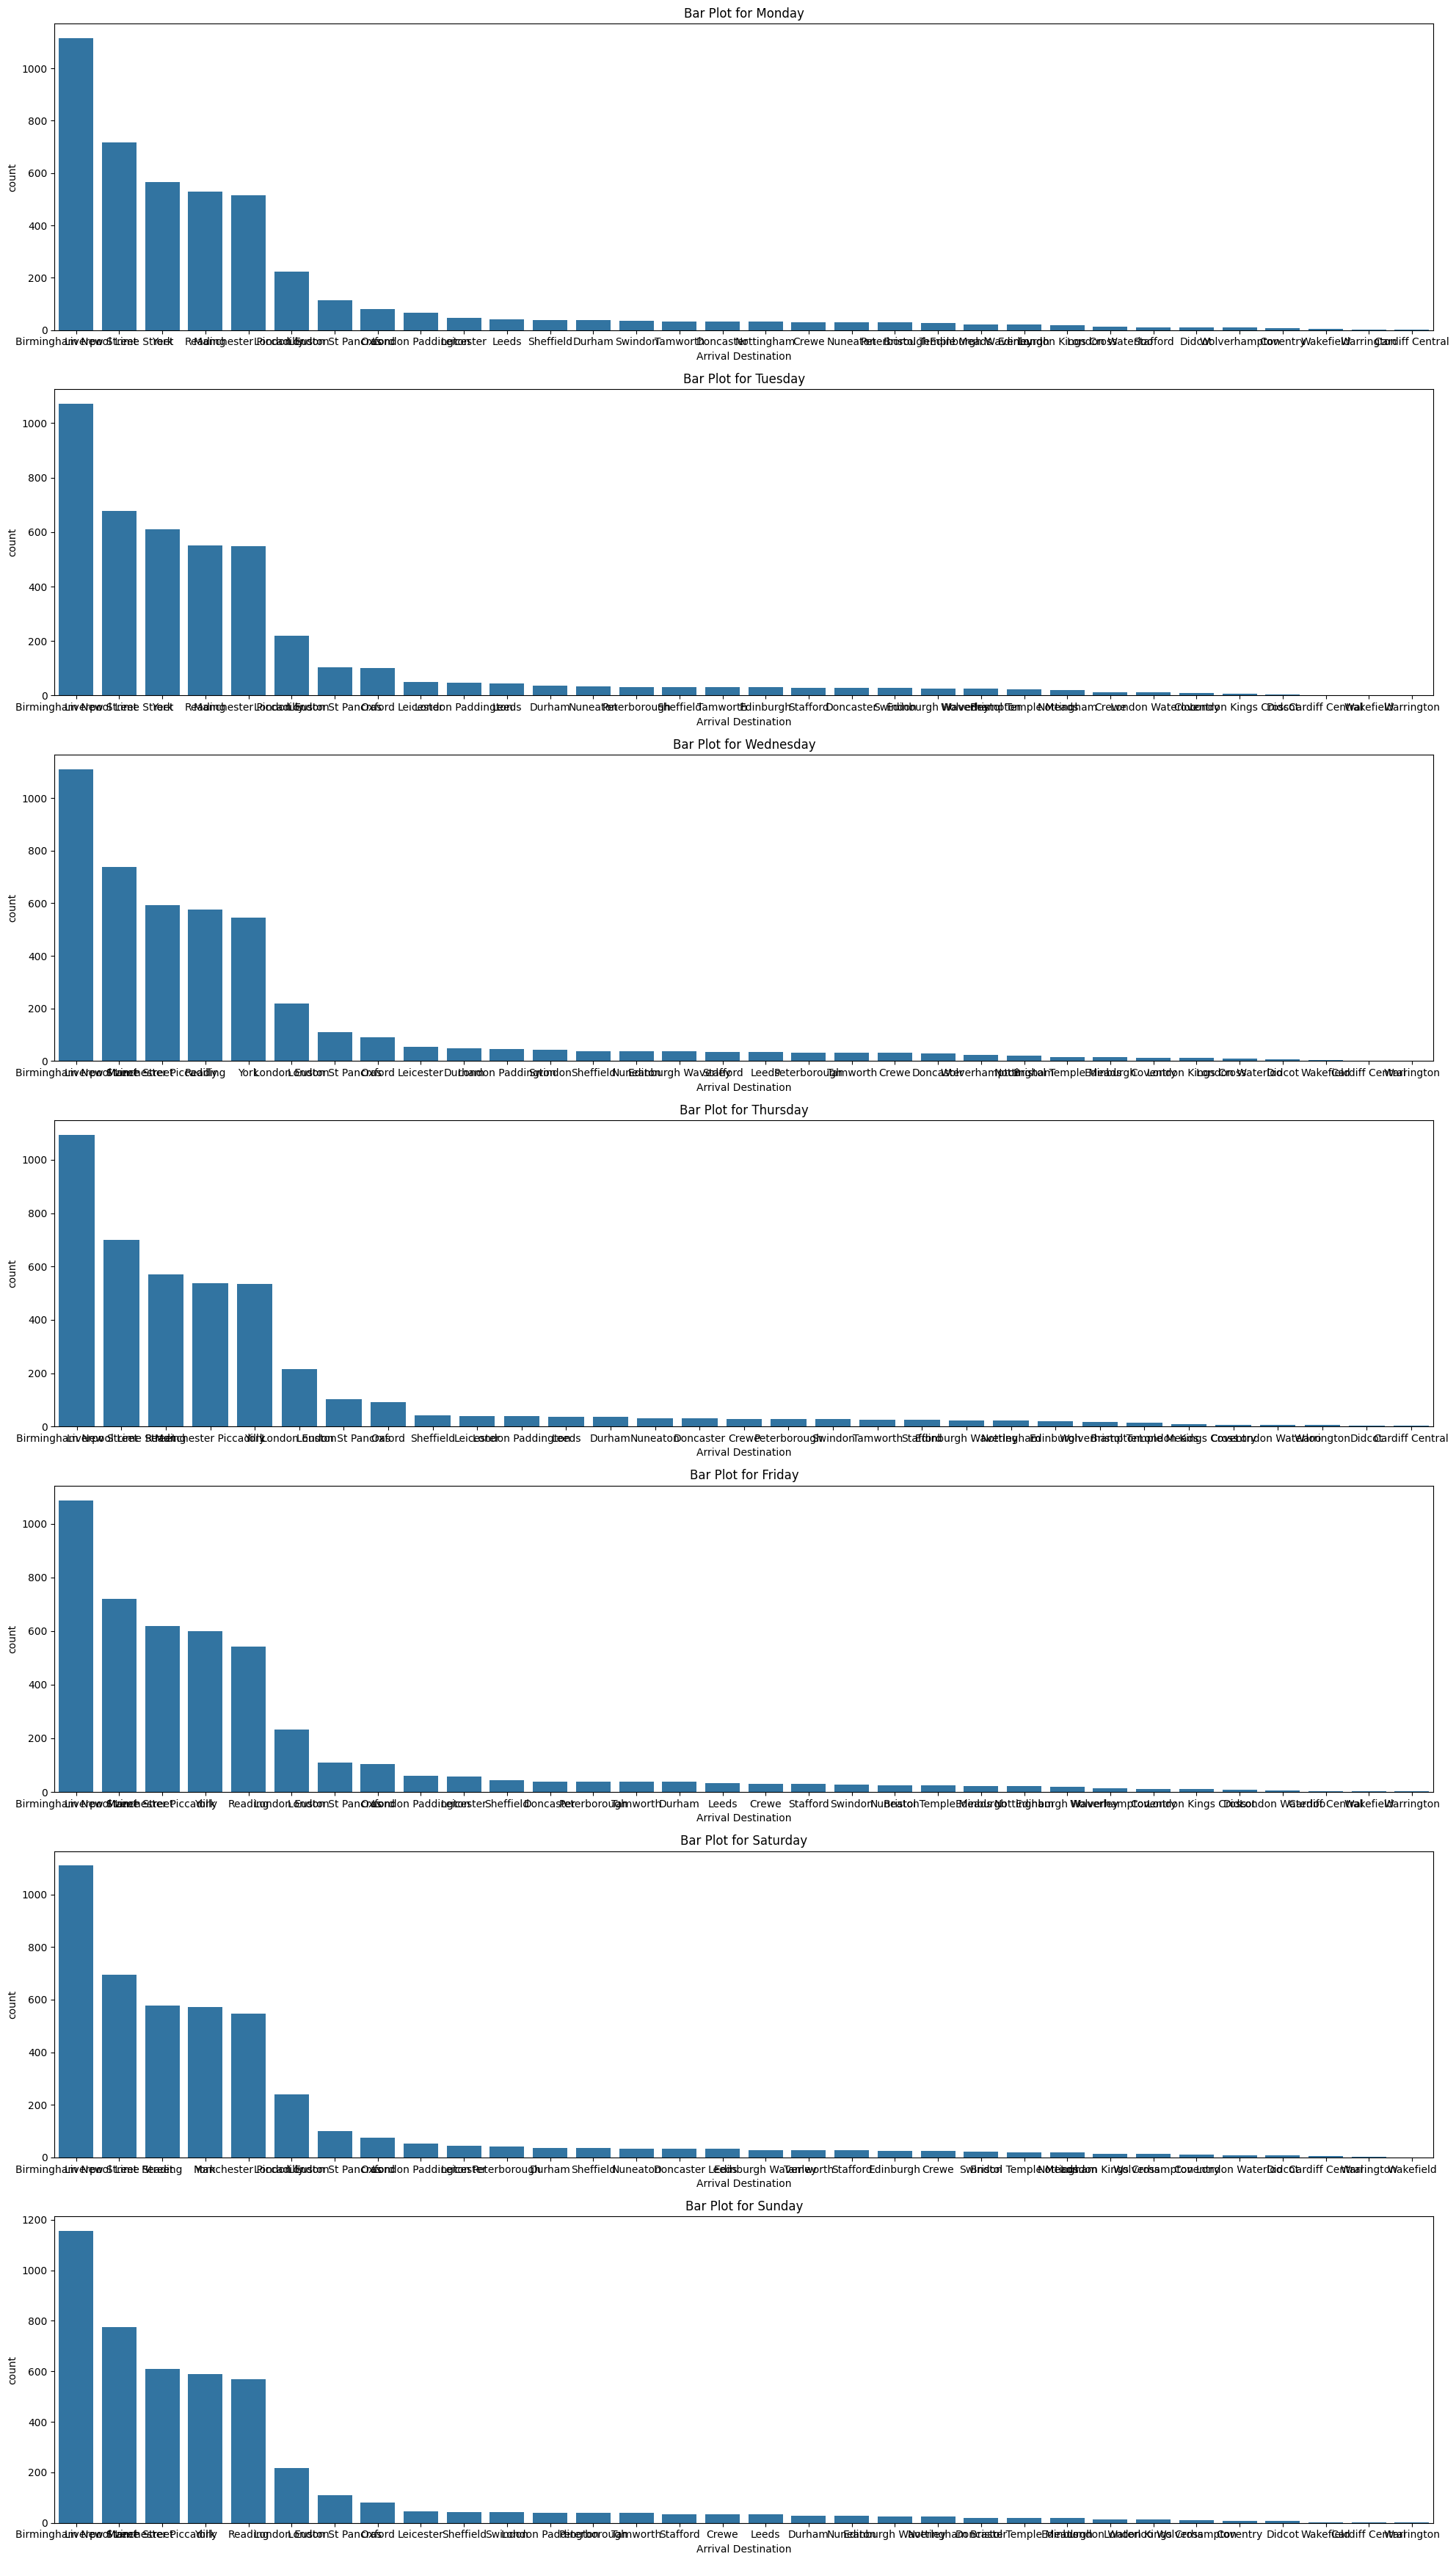

In [32]:
# Get unique days of the week
unique_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=len(unique_days), ncols=1, figsize=(20, 5*len(unique_days)))

# Iterate over unique days and create a plot for each
for i, day in enumerate(unique_days):
    # Filter data for the current day
    data_day = a3[a3['Day of week'] == day]
    
    # Create count plot for the current day
    sns.barplot(x="Arrival Destination", y ="count", data=data_day, ax=axes[i])
    
    # Set title for the plot
    axes[i].set_title(f'Bar Plot for {day}')
    
    
    # Optionally, set other plot properties such as x-axis label, y-axis label, etc.
    # axes[i].set_xlabel('Hour')
    # axes[i].set_ylabel('Count')
    # axes[i].legend(title='Hour')

# Adjust layout to prevent overlapping
plt.tight_layout()


# Show the plots
plt.show()

In [33]:
# Journey Status
uk_train["Journey Status"].unique()

array(['On Time', 'Delayed', 'Cancelled'], dtype=object)

In [34]:
a4 = uk_train.groupby("Day of week")["Journey Status"].value_counts().reset_index()
a4['Day of week'] = pd.Categorical(a4['Day of week'], categories=weekday_order, ordered=True)
a4 = a4.sort_values('Day of week')

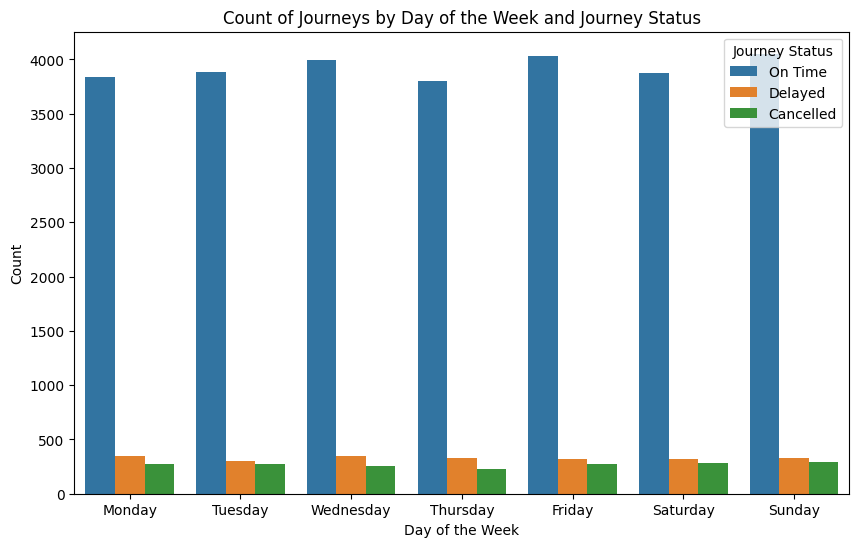

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of week', y='count', hue='Journey Status', data=a4)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Count of Journeys by Day of the Week and Journey Status')
plt.show()

In [36]:
stations =  pd.read_csv("D:/My Learning/My Projects/Project UK Railways/Data/uk-train-stations.csv")
stations.head()

,3alpha,station_name,latitude,longitude
0,AAP,Alexandra Palace Rail Station,51.597925,-0.120210
1,AAT,Achanalt Rail Station,57.609576,-4.913846
2,ABA,Aberdare Rail Station,51.715060,-3.443095
3,ABC,Altnabreac Rail Station,58.388133,-3.706287
4,ABD,Aberdeen Rail Station,57.143687,-2.098693


In [37]:
# removing Rail station from text 
stations["station_name"] = stations["station_name"].str.replace(" Rail Station", "")
stations["station_name"]

0                  Alexandra Palace
1                          Achanalt
2                          Aberdare
3                        Altnabreac
4                          Aberdeen
                   ...             
2590    Southease - Piddinghoe Road
2591                   Canada Water
2592            Farringdon (London)
2593                    Whitechapel
2594                        Lintley
Name: station_name, Length: 2595, dtype: object

In [38]:
stations.head()

,3alpha,station_name,latitude,longitude
0,AAP,Alexandra Palace,51.597925,-0.120210
1,AAT,Achanalt,57.609576,-4.913846
2,ABA,Aberdare,51.715060,-3.443095
3,ABC,Altnabreac,58.388133,-3.706287
4,ABD,Aberdeen,57.143687,-2.098693


In [39]:
Combined_df = pd.merge(uk_train,stations, left_on="Departure Station", right_on="station_name", how='left')
Combined_df.rename(columns={'latitude': 'Departure Latitude', 'longitude': 'Departure Longitude'}, inplace=True)
Combined_df.drop(columns=['3alpha', 'station_name'], inplace=True)
Combined_df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,...,Journey Status,Reason for Delay,Refund Request,route,Day of week,Hour of Departure,Hour of Purchase,Hour of Arrival,Departure Latitude,Departure Longitude
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,...,On Time,NaN,No,London PaddingtonLiverpool Lime Street,Friday,11,13,14.0,51.515995,-0.176149
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,...,Delayed,Signal Failure,No,London Kings CrossYork,Saturday,10,11,12.0,51.530884,-0.122900
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,...,On Time,NaN,No,Liverpool Lime StreetManchester Piccadilly,Tuesday,18,20,19.0,53.407324,-2.977726
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,...,On Time,NaN,No,London PaddingtonReading,Wednesday,22,23,23.0,51.515995,-0.176149
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,...,On Time,NaN,No,Liverpool Lime StreetLondon Euston,Wednesday,17,18,19.0,53.407324,-2.977726


In [40]:
Combined_df = pd.merge(Combined_df,stations, left_on="Arrival Destination", right_on="station_name", how='left')
Combined_df.rename(columns={'latitude': 'Arrival Latitude', 'longitude': 'Arrival Longitude'}, inplace=True)
Combined_df.drop(columns=['3alpha', 'station_name'], inplace=True)
Combined_df.head()


,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,...,Refund Request,route,Day of week,Hour of Departure,Hour of Purchase,Hour of Arrival,Departure Latitude,Departure Longitude,Arrival Latitude,Arrival Longitude
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,...,No,London PaddingtonLiverpool Lime Street,Friday,11,13,14.0,51.515995,-0.176149,53.407324,-2.977726
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,...,No,London Kings CrossYork,Saturday,10,11,12.0,51.530884,-0.122900,53.957982,-1.093191
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,...,No,Liverpool Lime StreetManchester Piccadilly,Tuesday,18,20,19.0,53.407324,-2.977726,53.477376,-2.230908
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,...,No,London PaddingtonReading,Wednesday,22,23,23.0,51.515995,-0.176149,51.458146,-0.971641
4,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,...,No,London PaddingtonReading,Wednesday,22,23,23.0,51.515995,-0.176149,51.458786,-0.971843


In [41]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6371.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [42]:
Combined_df.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               24344
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     2198
Journey Status             0
Reason for Delay       31611
Refund Request             0
route                      0
Day of week                0
Hour of Departure          0
Hour of Purchase           0
Hour of Arrival         2198
Departure Latitude         0
Departure Longitude        0
Arrival Latitude           0
Arrival Longitude          0
dtype: int64

In [43]:
Combined_df['Distance'] = Combined_df.apply(lambda row: calculate_distance(row['Departure Latitude'], row['Departure Longitude'], row['Arrival Latitude'], row['Arrival Longitude']), axis=1)

In [44]:
Combined_df['Distance'].head()

0    283.250938
1    277.664786
2     50.072002
3     55.453991
4     55.459256
Name: Distance, dtype: float64

In [45]:
departure_coords = [Combined_df["Departure Latitude"][0], Combined_df["Departure Longitude"][0]]
departure_coords

[51.51599535, -0.176149394]

In [46]:
import folium

In [47]:
data_filter = Combined_df[["Departure Station", "Arrival Destination", "Departure Latitude", "Departure Longitude", "Arrival Latitude", "Arrival Longitude"]].drop_duplicates()
len(data_filter)

73

In [48]:
print(Combined_df.isnull().sum())

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               24344
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     2198
Journey Status             0
Reason for Delay       31611
Refund Request             0
route                      0
Day of week                0
Hour of Departure          0
Hour of Purchase           0
Hour of Arrival         2198
Departure Latitude         0
Departure Longitude        0
Arrival Latitude           0
Arrival Longitude          0
Distance                   0
dtype: int64


In [49]:
coordinates = [55.3781, 3.4360]

site_map = folium.Map(location=coordinates, zoom_start=4, prefer_canvas=True, min_zoom=3, max_zoom=6)

for _, row in Combined_df.iterrows():
    departure_coords = [row["Departure Latitude"], row["Departure Longitude"]]
    arrival_coords = [row["Arrival Latitude"], row["Arrival Longitude"]]
    distance = row['Distance']
    folium.Marker(departure_coords, popup="Departure").add_to(site_map)
    folium.Marker(arrival_coords, popup="Arrival").add_to(site_map)

    folium.PolyLine(
        locations=[departure_coords, arrival_coords],
        popup=f"Estimated Distance Covered: {distance} km",
        weight=3
    ).add_to(site_map)


site_map

In [ ]:
import folium

# Coordinates for the map center
coordinates = [55.3781, 3.4360]

# Latitude and Longitude for departure and arrival
departure_coords = [51.515995, -0.176149]
arrival_coords = [53.407324, -2.977726]
distance = 283.339856

# Create the map
site_map = folium.Map(location=coordinates, zoom_start=6, prefer_canvas=True, min_zoom=6, max_zoom=6)

# Add markers with different colors using folium.Icon
folium.Marker(departure_coords, popup="Departure", icon=folium.Icon(color='red')).add_to(site_map)
folium.Marker(arrival_coords, popup="Arrival", icon=folium.Icon(color='green')).add_to(site_map)

# Add polyline
folium.PolyLine(locations=[departure_coords, arrival_coords], popup=f"Estimated Distance Covered: {distance} km", weight=3).add_to(site_map)

# Display the map
site_map


In [ ]:
Combined_df["Railcard"].unique()

In [ ]:
Combined_df["Ticket Type"].unique()

In [ ]:
# Predicting the actual price of before discount
def calculate_actual_price(row):
    paid_price = row["Price"]

    # checking 
    if row["Railcard"] != np.nan:
        paid_price *=  1.5 # reverse the 1/3 discount, if we reciprocal the amount paid 2/3.

    # Advance tickets are 1/2 off for 
    if row["Ticket Type"] == "Advance":
        paid_price *= 2

    elif row["Ticket Type"] == "Off-Peak":
        paid_price *= 1.25
    
    else:
        paid_price

    return paid_price


Combined_df['Actual Price'] = Combined_df.apply(calculate_actual_price, axis=1).round().astype('int')
Combined_df['Actual Price'].head()

In [ ]:
Combined_df['Discount'] = Combined_df['Actual Price'] - Combined_df["Price"] 

In [ ]:
Combined_df[(Combined_df["Departure Station"] == "London Paddington") & (Combined_df["Arrival Destination"] == "Oxford")].iloc[0]

In [ ]:
Combined_df["Discount"] = Combined_df["Actual Price"] - Combined_df["Price"]

In [ ]:
Combined_df.groupby('Date of Purchase')['Price'].sum().cumsum()

In [ ]:

g1 = Combined_df.groupby("Purchase Type")["Purchase Type"].value_counts().reset_index()
g1

In [ ]:
Class = Combined_df.groupby(["Ticket Class"])["Ticket Class"].value_counts().reset_index()
Class

In [ ]:
sb = Combined_df.groupby(["Purchase Type", "Payment Method", "Journey Status"])["Journey Status"].value_counts().reset_index()
sb

In [ ]:
fig = px.sunburst(sb, path=["Purchase Type", "Payment Method", "Journey Status"], values="count", color="Purchase Type")
fig.show()

In [ ]:
sb = Combined_df.groupby(["Hour of Departure", "Journey Status"])["Journey Status"].value_counts().reset_index()
fig = px.sunburst(sb, path=["Hour of Departure", "Journey Status"], values="count", color="Journey Status")
fig.show()

In [ ]:
bar5= Combined_df[Combined_df["Journey Status"]=="Cancelled"]["Hour of Purchase"].value_counts().reset_index()
px.bar(bar5, x="count", y="Hour of Purchase", orientation='h')


In [ ]:
bar5.head()

In [ ]:
Combined_df.to_csv("D:/My Learning/My Projects/Project UK Railways/Data/Uk-Train Data.csv")


In [ ]:
Combined_df.to_csv("D:/My Learning/My Projects/Project UK Railways/Flask App/Data/Uk-Train Data.csv")
